<a href="https://colab.research.google.com/github/atomlattice/Springboard-Capstone-2/blob/main/data_wrangling_WHO_life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of WHO life expectancy data 2000-2015: what countries have the highest life expectancy consistently over these 15 years, and why?

In [20]:
#import the pandas, numpy libraries as pd, and np 
import pandas as pd
import numpy as np

#need this line for Google apparently
%matplotlib inline
import matplotlib.pyplot as plt

import pandas_profiling

import io

In [2]:
#ACQUIRE
from google.colab import files
 
 
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [3]:
# Put this data into a variable  
WHO_data = pd.read_csv(io.BytesIO(uploaded['Life Expectancy Data.csv']))

# Using the head() pandas method, observe the first three entries.
WHO_data.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [4]:
WHO_data.shape

(2938, 22)

In [ ]:
WHO_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Data types appear to be correct.

In [6]:
list(WHO_data.columns)

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [7]:
#I see that some of these column names have spaces at the end - this isn't helpful!
WHO_data.columns = WHO_data.columns.str.strip()

In [8]:
#fixed? yes
list(WHO_data.columns)

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [10]:
#view report
#commented out due to issues displaying Pandas Profiling
#report = WHO_data.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
#report

In [11]:
#Rename messy columns we think will be useful
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
WHO_data.rename(columns = {'Life expectancy':'Life_Expectancy', 'percentage expenditure': 'Percentage_Expenditure', "Income composition of resources": "Income_Composition_Resources", "Total expenditure": "Total_Expenditure"}, inplace = True)
WHO_data.head(5)

,Country,Year,Status,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,Percentage_Expenditure,Hepatitis B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Composition_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
#what countries are we looking at?
pd.unique(WHO_data['Country'])

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [13]:
#how many countries?
WHO_data.Country.unique().size

193

In [14]:
#look at some means, etc.
#mean LE by country over 15 years
WHO_data.groupby("Country")['Life_Expectancy'].mean()

Country
Afghanistan                           58.19375
Albania                               75.15625
Algeria                               73.61875
Angola                                49.01875
Antigua and Barbuda                   75.05625
                                        ...   
Venezuela (Bolivarian Republic of)    73.38750
Viet Nam                              74.77500
Yemen                                 63.86250
Zambia                                53.90625
Zimbabwe                              50.48750
Name: Life_Expectancy, Length: 193, dtype: float64

In [15]:
#look more closely at what columns have NaNs and zeros
WHO_data.isna().any()

Country                         False
Year                            False
Status                          False
Life_Expectancy                  True
Adult Mortality                  True
infant deaths                   False
Alcohol                          True
Percentage_Expenditure          False
Hepatitis B                      True
Measles                         False
BMI                              True
under-five deaths               False
Polio                            True
Total_Expenditure                True
Diphtheria                       True
HIV/AIDS                        False
GDP                              True
Population                       True
thinness  1-19 years             True
thinness 5-9 years               True
Income_Composition_Resources     True
Schooling                        True
dtype: bool

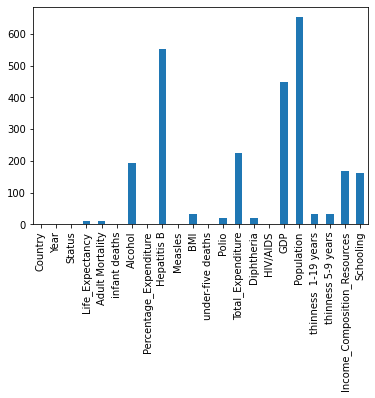

In [21]:
WHO_data.isna().sum().plot(kind="bar")
plt.show()

This is concerning! I could potentially pull in data about GDP and Population, potentially Total Expenditure. But the others I would need to automatically generate, so might as well try to do that for all variables with missing values.

In [22]:
#what about a large "developed" country - what is missing from data?
WHO_data[WHO_data.Country == "United States of America"].T

,2794,2795,2796,2797,2798,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808,2809
Country,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America
Year,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
Status,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed
Life_Expectancy,79.3,79.1,78.9,78.8,78.7,78.7,78.5,78.2,78.1,77.8,77.5,77.5,77.2,77.0,76.9,76.8
Adult Mortality,13.0,14.0,16.0,16.0,16.0,15.0,18.0,18.0,11.0,113.0,112.0,111.0,114.0,115.0,115.0,114.0
infant deaths,23,23,23,24,25,25,26,27,27,28,28,28,28,28,28,28
Alcohol,NaN,8.82,8.82,8.82,8.67,8.55,8.71,8.74,8.74,8.63,8.52,8.48,8.4,8.33,8.25,8.21
Percentage_Expenditure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hepatitis B,92.0,92.0,91.0,9.0,91.0,92.0,92.0,94.0,93.0,93.0,93.0,92.0,92.0,88.0,89.0,9.0
Measles,188,667,187,55,220,63,71,140,43,55,66,37,56,41,116,85


Looks like as an example there is data missing for some years for the US, but then there are variables for which the US has no entries for any years, and they seem potentially significant - GDP, Population, etc. Need to do something about this - can't throw away the US entirely.

In [23]:
#Try to fill missing values
#Interpolate backwardly across the column:
WHO_data.interpolate(method ='linear', limit_direction ='backward', inplace=True)
#Interpolate in forward order across the column:
WHO_data.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [24]:
#check with US as example
WHO_data[WHO_data.Country == "United States of America"].T

,2794,2795,2796,2797,2798,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808,2809
Country,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America
Year,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
Status,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed
Life_Expectancy,79.3,79.1,78.9,78.8,78.7,78.7,78.5,78.2,78.1,77.8,77.5,77.5,77.2,77.0,76.9,76.8
Adult Mortality,13.0,14.0,16.0,16.0,16.0,15.0,18.0,18.0,11.0,113.0,112.0,111.0,114.0,115.0,115.0,114.0
infant deaths,23,23,23,24,25,25,26,27,27,28,28,28,28,28,28,28
Alcohol,6.355,8.82,8.82,8.82,8.67,8.55,8.71,8.74,8.74,8.63,8.52,8.48,8.4,8.33,8.25,8.21
Percentage_Expenditure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hepatitis B,92.0,92.0,91.0,9.0,91.0,92.0,92.0,94.0,93.0,93.0,93.0,92.0,92.0,88.0,89.0,9.0
Measles,188,667,187,55,220,63,71,140,43,55,66,37,56,41,116,85


In [26]:
#now deal with all the zeros - replace with NaNs then replace as done above
WHO_data.replace(0,np.nan, inplace = True)
WHO_data.interpolate(inplace=True)

In [27]:
#check with US as example
WHO_data[WHO_data.Country == "United States of America"].T

,2794,2795,2796,2797,2798,2799,2800,2801,2802,2803,2804,2805,2806,2807,2808,2809
Country,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America
Year,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
Status,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed
Life_Expectancy,79.3,79.1,78.9,78.8,78.7,78.7,78.5,78.2,78.1,77.8,77.5,77.5,77.2,77.0,76.9,76.8
Adult Mortality,13.0,14.0,16.0,16.0,16.0,15.0,18.0,18.0,11.0,113.0,112.0,111.0,114.0,115.0,115.0,114.0
infant deaths,23.0,23.0,23.0,24.0,25.0,25.0,26.0,27.0,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0
Alcohol,6.355,8.82,8.82,8.82,8.67,8.55,8.71,8.74,8.74,8.63,8.52,8.48,8.4,8.33,8.25,8.21
Percentage_Expenditure,395.408302,399.421918,403.435535,407.449151,411.462768,415.476384,419.490001,423.503617,427.517234,431.53085,435.544467,439.558083,443.5717,447.585316,451.598933,455.612549
Hepatitis B,92.0,92.0,91.0,9.0,91.0,92.0,92.0,94.0,93.0,93.0,93.0,92.0,92.0,88.0,89.0,9.0
Measles,188.0,667.0,187.0,55.0,220.0,63.0,71.0,140.0,43.0,55.0,66.0,37.0,56.0,41.0,116.0,85.0


In [28]:
#got all the zeros?
WHO_data.all()

Country                         True
Year                            True
Status                          True
Life_Expectancy                 True
Adult Mortality                 True
infant deaths                   True
Alcohol                         True
Percentage_Expenditure          True
Hepatitis B                     True
Measles                         True
BMI                             True
under-five deaths               True
Polio                           True
Total_Expenditure               True
Diphtheria                      True
HIV/AIDS                        True
GDP                             True
Population                      True
thinness  1-19 years            True
thinness 5-9 years              True
Income_Composition_Resources    True
Schooling                       True
dtype: bool

In [29]:
WHO_data.isna().any()

Country                         False
Year                            False
Status                          False
Life_Expectancy                 False
Adult Mortality                 False
infant deaths                   False
Alcohol                         False
Percentage_Expenditure          False
Hepatitis B                     False
Measles                         False
BMI                             False
under-five deaths               False
Polio                           False
Total_Expenditure               False
Diphtheria                      False
HIV/AIDS                        False
GDP                             False
Population                      False
thinness  1-19 years            False
thinness 5-9 years              False
Income_Composition_Resources    False
Schooling                       False
dtype: bool

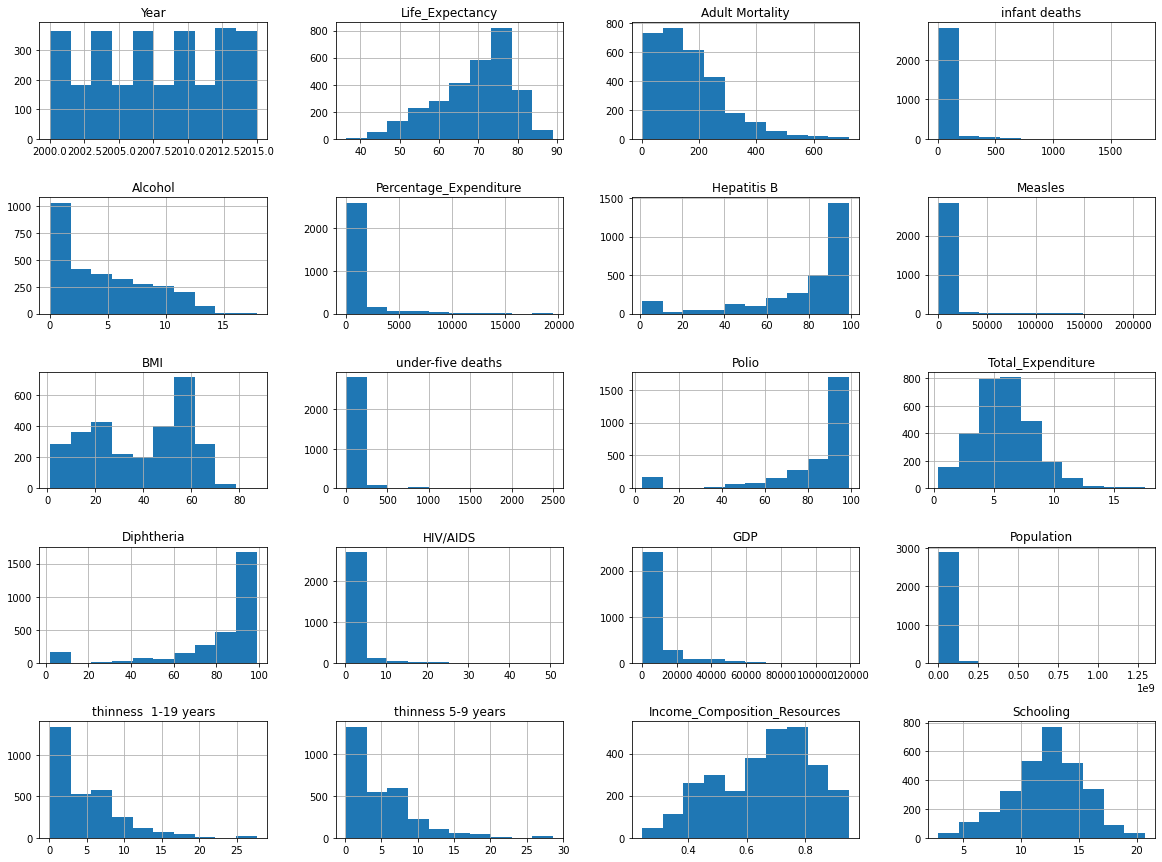

In [30]:
#checking the histograms
WHO_data.hist(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5);

Even just looking at the histograms I'm seeing that Schooling, Total Expenditure, and Income Composition of Resources are the most similar in shape to Life Expectancy.

In [31]:
#standard deviation of columns
WHO_data.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Year                            4.613841e+00
Life_Expectancy                 9.510819e+00
Adult Mortality                 1.242266e+02
infant deaths                   1.256106e+02
Alcohol                         3.994827e+00
Percentage_Expenditure          2.123240e+03
Hepatitis B                     2.518377e+01
Measles                         1.224417e+04
BMI                             1.999140e+01
under-five deaths               1.711215e+02
Polio                           2.342069e+01
Total_Expenditure               2.445735e+00
Diphtheria                      2.370566e+01
HIV/AIDS                        5.077785e+00
GDP                             1.341102e+04
Population                      5.471776e+07
thinness  1-19 years            4.433359e+00
thinness 5-9 years              4.532488e+00
Income_Composition_Resources    1.615143e-01
Schooling                       3.141208e+00
dtype: float64

In [32]:
#write corrected data to a new CSV!
#WHO_data.to_csv('C:\\Users\\Sarah\\Documents\\Springboard\PROJECTS ASSIGNMENTS files and instructions\\Capstones\\Capstone 2\wrangled_WHO_data.csv', index=False)